## Artesian Well

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [25]:
data_fields = [
    "applicationID", "applicationName", "data_boardVoltage", "data_pressure_0", 
    "data_pressure_1", "devEUI", "fCnt", "fPort", "host", "nodeName", 
    "rxInfo_altitude_0", "rxInfo_altitude_1", "rxInfo_latitude_0", 
    "rxInfo_latitude_1", "rxInfo_loRaSNR_0", "rxInfo_loRaSNR_1", 
    "rxInfo_longitude_0", "rxInfo_longitude_1", "rxInfo_mac_0", "rxInfo_mac_1", 
    "rxInfo_name_0", "rxInfo_name_1", "rxInfo_rssi_0", "rxInfo_rssi_1", "time", 
    "txInfo_adr", "txInfo_codeRate", "txInfo_dataRate_bandwidth", 
    "txInfo_dataRate_modulation", "txInfo_dataRate_spreadFactor", 
    "txInfo_frequency"
]

df_artesian_well = pd.read_csv(r'data/ArtesianWell.csv', header=3, usecols=data_fields)
df_artesian_well["time"] = pd.to_datetime(df_artesian_well["time"])
df_artesian_well["pressure_difference"] = df_artesian_well["data_pressure_1"] - df_artesian_well["data_pressure_0"]

In [26]:
print("Diferença de pressão média: ", df_artesian_well["pressure_difference"].mean())
print("Diferença de pressão desvio padrão: ", df_artesian_well["pressure_difference"].std())


Diferença de pressão média:  2304.3793103448274
Diferença de pressão desvio padrão:  6.599440660619438


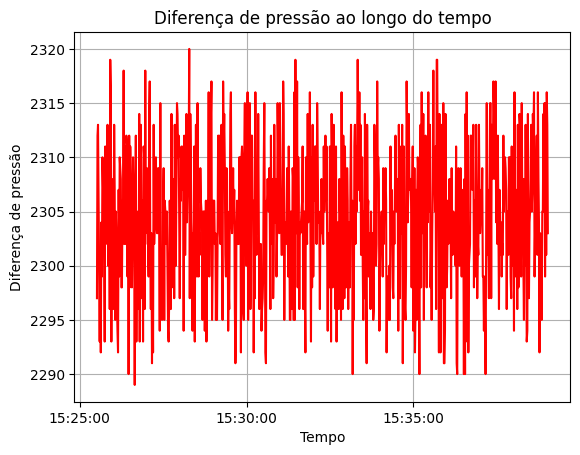

In [28]:
sns.lineplot(data=df_artesian_well, x="time", y="pressure_difference", color="red")
plt.xlabel("Tempo")
plt.ylabel("Diferença de pressão")
plt.title("Diferença de pressão ao longo do tempo")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.grid()
plt.show()

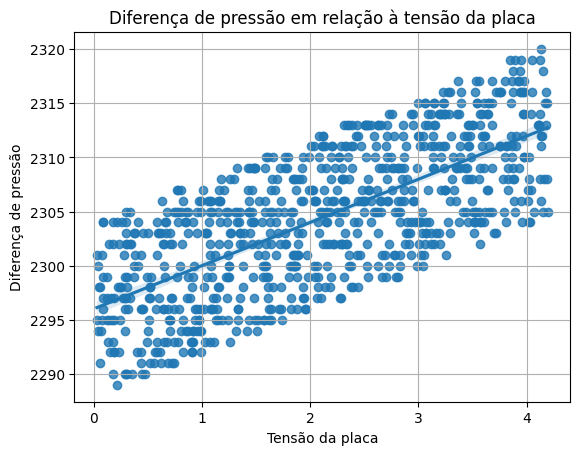

In [ ]:
sns.regplot(data=df_artesian_well, x="data_boardVoltage", y="pressure_difference")
plt.xlabel("Tensão da placa")
plt.ylabel("Diferença de pressão")
plt.title("Diferença de pressão em relação à tensão da placa")
plt.grid()
plt.show()